## Reto 3: Tablas de contingencia

### 1. Objetivos:
    - Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.

---
    
### 2. Desarrollo:

En este Reto vamos a volver a utilizar el dataset 'melbourne_housing-clean.csv'. Nuestro objetivo será segmentar nuestros datos usando 2 o 3 variables categóricas y luego realizar algunas visualizaciones. Elige el Reto a) o b) y sigue las instrucciones.

### a) Segmentando por tipo y número de cuartos

La primera parte consiste en lo siguiente:

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
3. Agrega los títulos y anotaciones necesarias.
4. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [1]:
#montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 25.722222222222214, 'Cantidad de cuartos')

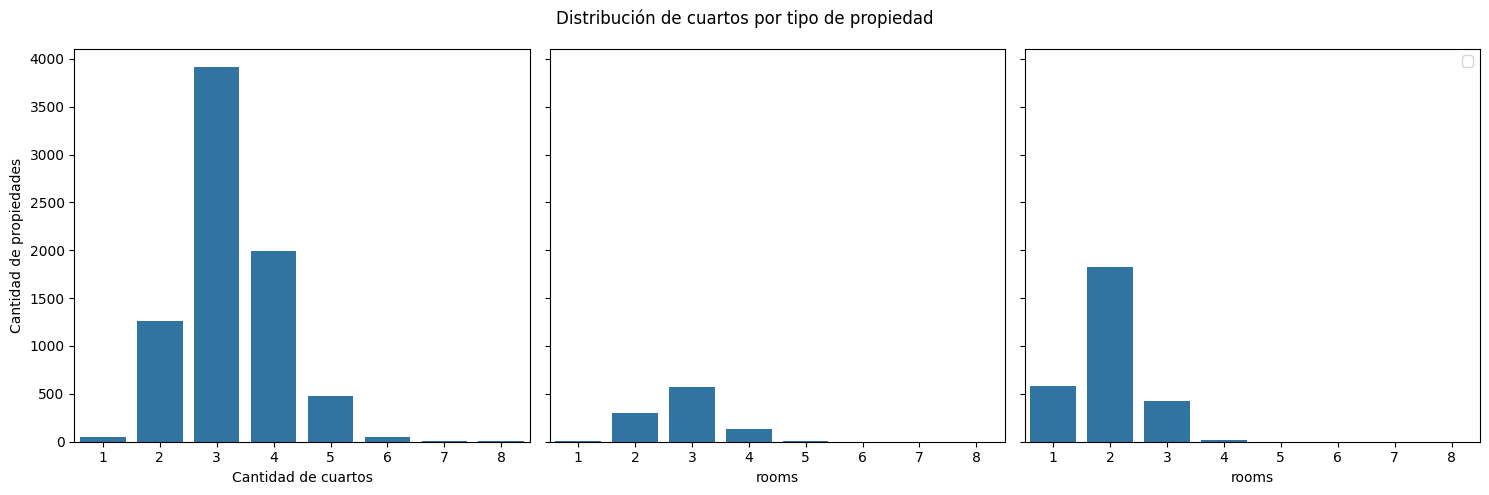

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importar df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/melbourne_housing-clean.csv', index_col=0)
type_rooms = pd.crosstab(df['type'], df['rooms'])

fig,axes=plt.subplots(1,3,figsize=(15,5),sharey=True)
plt.suptitle('Distribución de cuartos por tipo de propiedad')

# Pass data as a DataFrame and specify x and y columns
sns.barplot(x=type_rooms.loc['h'].index, y=type_rooms.loc['h'], ax=axes[0])
sns.barplot(x=type_rooms.loc['t'].index, y=type_rooms.loc['t'], ax=axes[1])
sns.barplot(x=type_rooms.loc['u'].index, y=type_rooms.loc['u'], ax=axes[2])

plt.legend()
plt.tight_layout()
axes[0].set_ylabel('Cantidad de propiedades')
axes[0].set_xlabel('Cantidad de cuartos')

### b) Segmentando por región, tipo y número de cuartos

Ahora vamos a hacer una triple segmentación. Realiza los siguientes pasos:

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.
4. Anota tus gráficas adecuadamente.
5. Describe las similitudes y diferencias entre las 4 gráficas.

<ipython-input-30-1f5e62852622>:6: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  regionname_type_rooms_stacked = regionname_type_rooms.stack(level=0)


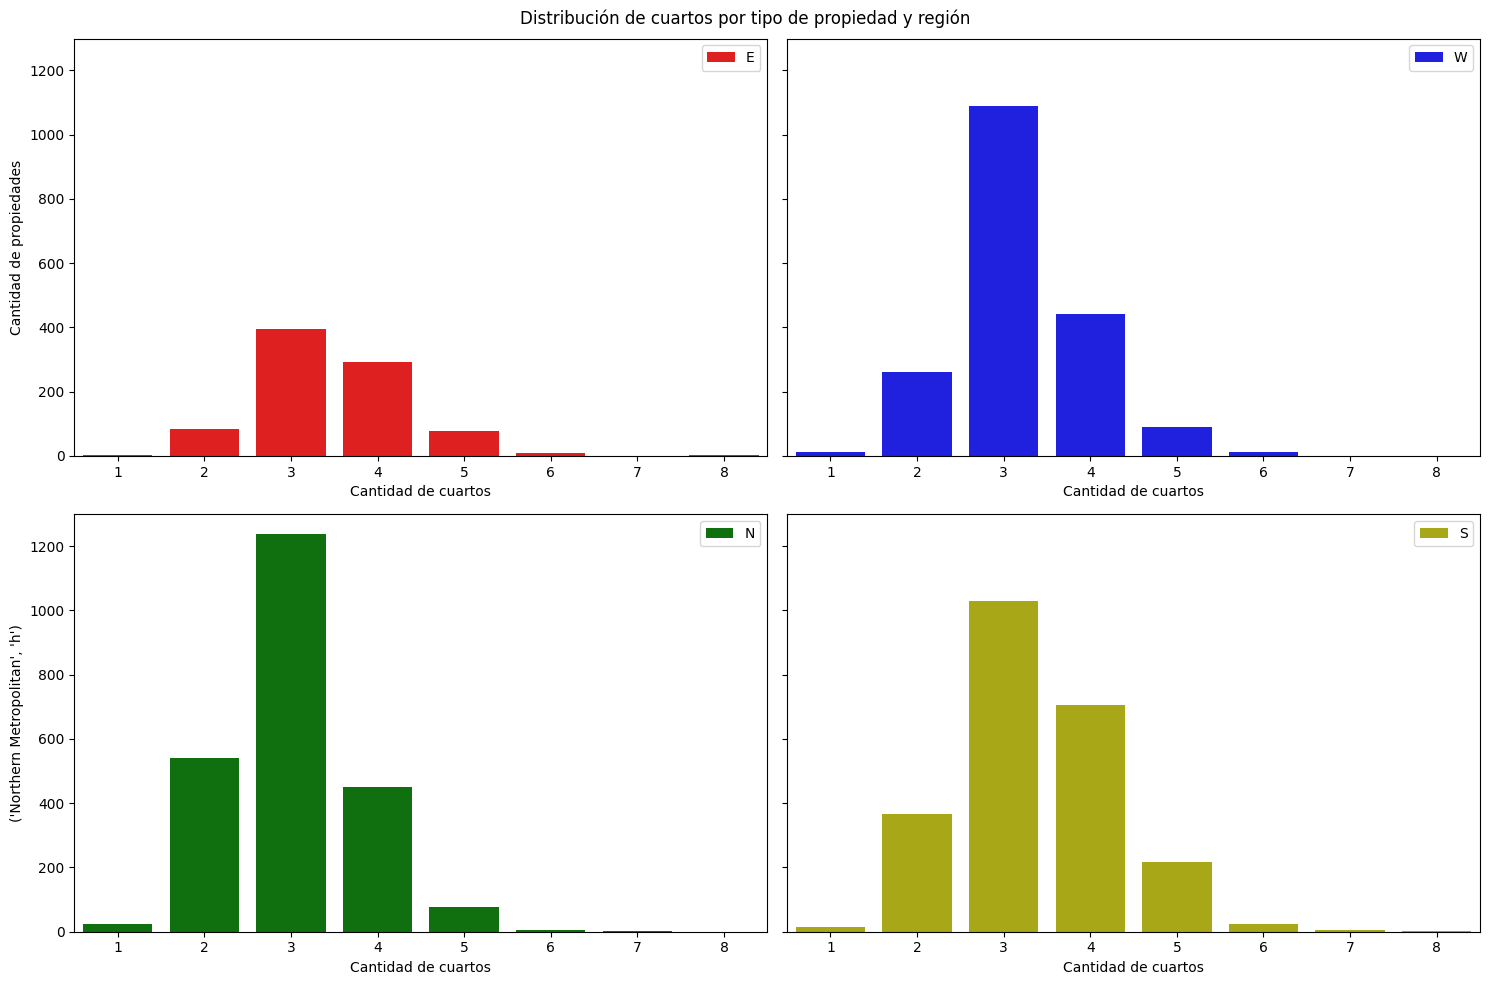

In [30]:
import pandas as pd
import seaborn as sns

# Tu código va aquí
regionname_type_rooms = pd.crosstab(df['region_name'], [df['type'], df['rooms']])
regionname_type_rooms_stacked = regionname_type_rooms.stack(level=0)
fig,axes=plt.subplots(2,2,figsize=(15,10),sharey=True)
plt.suptitle('Distribución de cuartos por tipo de propiedad y región')

sns.barplot(x=regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h'),].index, y=regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')], ax=axes[0,0], color='r', label='E')
sns.barplot(x=regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h'),].index, y=regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')], ax=axes[0,1],color='b',label='W')
sns.barplot(x=regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')].index, y=regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')], ax=axes[1,0],color='g',label='N')
sns.barplot(x=regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')].index, y=regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')], ax=axes[1,1],color='y',label='S')

axes[0,0].set_ylabel('Cantidad de propiedades')
axes[0,0].set_xlabel('Cantidad de cuartos')
axes[0,1].set_xlabel('Cantidad de cuartos')
axes[1,0].set_xlabel('Cantidad de cuartos')
axes[1,1].set_xlabel('Cantidad de cuartos')
plt.tight_layout()


<details><summary>Solución</summary>

```python
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv', index_col=0)
    
type_rooms = pd.crosstab(df['type'], df['rooms'])
sns.barplot(type_rooms.loc['h'].index, type_rooms.loc['h'])
sns.barplot(type_rooms.loc['t'].index, type_rooms.loc['t'])
sns.barplot(type_rooms.loc['u'].index, type_rooms.loc['u'])
    
regionname_type_rooms = pd.crosstab(df['region_name'], [df['type'], df['rooms']])
regionname_type_rooms_stacked = regionname_type_rooms.stack(level=0)
sns.barplot(regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')])
sns.barplot(regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')])
```
    
</details>